##### Challenge 1

Fit a model to your data. Now you know the coefficients (the beta
values).
Write a python function to simulate outcomes.
(The sigma of the normal noise distribution will be the std deviation
of the residuals.)
For the same observed input variables, simulate the outcome.
Plot the observed data and the simulated data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.api as sm
import csv

%matplotlib inline
# import mpld3

In [2]:
df = pd.DataFrame.from_csv('2013_movies.csv', parse_dates=True, infer_datetime_format=True)

In [3]:
df = sm.add_constant(df)

In [4]:
df.dtypes

const                   int64
Budget                float64
DomesticTotalGross      int64
Director               object
Rating                 object
Runtime                 int64
ReleaseDate            object
dtype: object

In [5]:
df = df.convert_objects(convert_dates=True)

In [6]:
model = smf.ols("DomesticTotalGross ~ Budget + Runtime", data=df)
fitted = model.fit()
fitted.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     DomesticTotalGross   R-squared:                       0.291
Model:                            OLS   Adj. R-squared:                  0.274
Method:                 Least Squares   F-statistic:                     17.63
Date:                Sun, 03 May 2015   Prob (F-statistic):           3.83e-07
Time:                        20:00:22   Log-Likelihood:                -1737.7
No. Observations:                  89   AIC:                             3481.
Df Residuals:                      86   BIC:                             3489.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept   5.731e+06   5.13e+07      0.112      0.911     -9.62e+07  1.08e+08
Budget         0.7456      0.142      5.237      0.000         0.463     1.029
Runtime     3.695e+05   4.75e+05      0.778      0.439     -5.74e+05  1.31e+06
==============================================================================
Omnibus:                       40.192   Durbin-Watson:                   0.716
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              101.831
Skew:                           1.600   Prob(JB):                     7.72e-23
Kurtosis:                       7.149   Cond. No.                     6.21e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.21e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [7]:
residuals_std_dev = np.std(fitted.resid)

In [8]:
from random import normalvariate

def simulated_outcomes(df):
    intercept = 5731000
    noise = normalvariate(0, 475000)
    df2 = df.copy()
    df2['BudgetSim'] = df2.Budget.apply(lambda x: x*0.7456)
    df2['RuntimeSim'] = df2.Runtime.apply(lambda x: x*369500)
    df2['GrossSim'] = intercept + df2.BudgetSim + df2.RuntimeSim
    df2['GrossSimResiduals'] = intercept + df2.BudgetSim + df2.RuntimeSim + normalvariate(0,residuals_std_dev)
    df2['Noise'] = normalvariate(0, abs(df2.DomesticTotalGross - df2.GrossSim))
    df2['NoiseyGrossSim'] = intercept + df2.BudgetSim + df2.RuntimeSim + df2.Noise
    return df2

In [9]:
df3 = simulated_outcomes(df)

In [10]:
df3.head()

,const,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate,BudgetSim,RuntimeSim,GrossSim,GrossSimResiduals,Noise,NoiseyGrossSim
Title,,,,,,,,,,,,,
The Hunger Games: Catching Fire,1,130000000,424668047,Francis Lawrence,PG-13,146,2013-11-22 00:00:00,96928000,53947000,156606000,3.484736e+07,-94415716.181352,6.219028e+07
Iron Man 3,1,200000000,409013994,Shane Black,PG-13,129,2013-05-03 00:00:00,149120000,47665500,202516500,8.075786e+07,-72731701.499185,1.297848e+08
Frozen,1,150000000,400738009,Chris BuckJennifer Lee,PG,108,2013-11-22 00:00:00,111840000,39906000,157477000,3.571836e+07,-85680396.164897,7.179660e+07
Despicable Me 2,1,76000000,368061265,Pierre CoffinChris Renaud,PG,98,2013-07-03 00:00:00,56665600,36211000,98607600,-2.315104e+07,-94905866.173085,3.701734e+06
Man of Steel,1,225000000,291045518,Zack Snyder,PG-13,143,2013-06-14 00:00:00,167760000,52838500,226329500,1.045709e+08,-22794010.775704,2.035355e+08


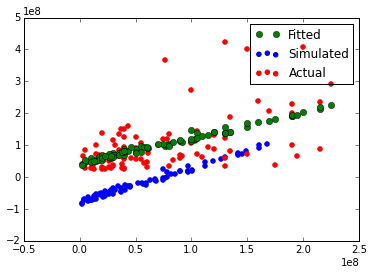

In [11]:
#plot of simulated with residuals as epsilon vs fitted vs actual
plt.scatter(df3.BudgetSim, df3.GrossSimResiduals, color ='b')
plt.scatter(df.Budget, df.DomesticTotalGross, color ='r')
plt.plot(df.Budget.dropna(), fitted.fittedvalues, 'go')
plt.legend(['Fitted', 'Simulated', 'Actual'])

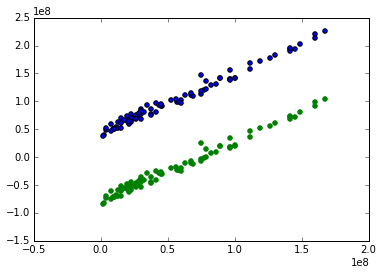

In [12]:
#plot of simulated with and without epsilon
plt.scatter(df3.BudgetSim, df3.GrossSimResiduals, color = 'g')
plt.scatter(df3.BudgetSim, df3.GrossSim)

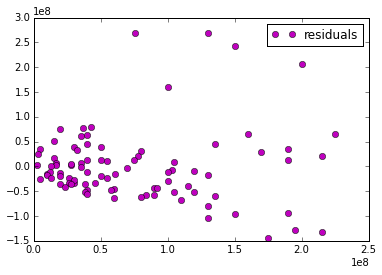

In [13]:
#plot of residuals for fitted
plt.plot(df.Budget.dropna(), fitted.resid, 'mo')
plt.legend(['residuals'])

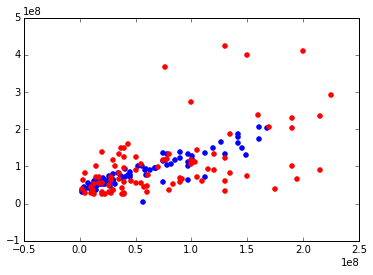

In [40]:
#plot of nonsensical epsilon vs actual
plt.scatter(df3.BudgetSim, df3.NoiseyGrossSim, color ='b')
plt.scatter(df.Budget, df.DomesticTotalGross, color ='r')

##### Challenge 2

Generate (fake) data that is linearly related to log(x).
Basically write an underlying model just like in challenge 1, but
instead of a fitted model, you are making this model up. It is of the
form B0 + B1log(x) + epsilon. You are making up the parameters.
Simulate some data from this model.
Then fit two models to it:
a) quadratic [second degree polynomial]
b) logarithmic [log(x)]
(the second one should fit really well, since it has the same form as
the underlying model!)

In [15]:
fake_data = pd.DataFrame({'X': np.linspace(1,100, 100)})

In [16]:
import math
intercept = 5
sigma = 10
fake_data['y'] = fake_data.X.apply(lambda x: intercept + math.log(x) + normalvariate(0, sigma) )

In [17]:
fake_data = sm.add_constant(fake_data)

In [18]:
fake_data.head()

,const,X,y
0,1,1,-9.362379
1,1,2,5.352615
2,1,3,13.730521
3,1,4,20.440466
4,1,5,-0.860942


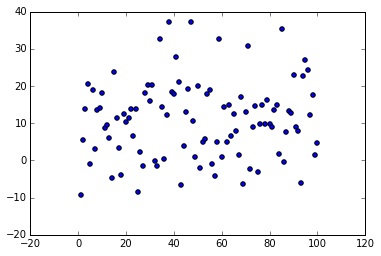

In [19]:
plt.scatter(fake_data.X, fake_data.y)

In [20]:
model = sm.OLS(fake_data.y, fake_data.X).fit()

In [21]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.434
Model:                            OLS   Adj. R-squared:                  0.428
Method:                 Least Squares   F-statistic:                     75.88
Date:                Sun, 03 May 2015   Prob (F-statistic):           7.04e-14
Time:                        20:00:25   Log-Likelihood:                -384.14
No. Observations:                 100   AIC:                             770.3
Df Residuals:                      99   BIC:                             772.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
X              0.1697      0.019      8.711      0.000         0.131     0.208
==============================================================================
Omnibus:                        1.666   Durbin-Watson:                   1.691
Prob(Omnibus):                  0.435   Jarque-Bera (JB):                1.707
Skew:                           0.265   Prob(JB):                        0.426
Kurtosis:                       2.641   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [22]:
fake_data['quadratic'] = fake_data.X.apply(lambda x: 2 * x**2 + 3 * x + 4)
fake_data['logarithmic'] = fake_data.X.apply(lambda x: math.log(x))

In [23]:
fake_data.head()

,const,X,y,quadratic,logarithmic
0,1,1,-9.362379,9,0.000000
1,1,2,5.352615,18,0.693147
2,1,3,13.730521,31,1.098612
3,1,4,20.440466,48,1.386294
4,1,5,-0.860942,69,1.609438


(-15, 40)

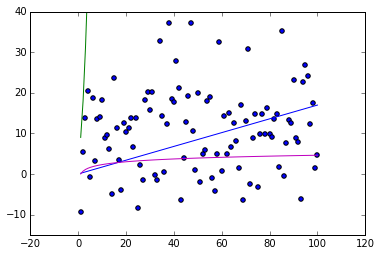

In [24]:
plt.scatter(fake_data.X, fake_data.y)
plt.plot(fake_data.X, model.fittedvalues)
plt.plot(fake_data.X, fake_data.quadratic)
plt.plot(fake_data.X, fake_data.logarithmic, 'm')
plt.ylim(-15,40)

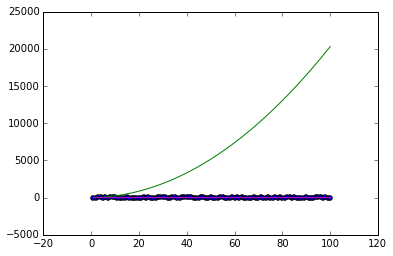

In [25]:
plt.scatter(fake_data.X, fake_data.y)
plt.plot(fake_data.X, model.fittedvalues)
plt.plot(fake_data.X, fake_data.quadratic)
plt.plot(fake_data.X, fake_data.logarithmic, 'm')

##### Challenge 3

Fit a model to your training set. Calculate mean squared error on your
training set. Then calculate it on your test set.
(You can use `sklearn.metrics.mean_squared_error`.)

In [26]:
from sklearn.cross_validation import train_test_split
df_train, df_test = train_test_split(df.dropna(), test_size=0.33)

In [27]:
from sklearn.metrics import mean_squared_error
model = sm.OLS(df_train.DomesticTotalGross, df_train.Budget).fit()

In [28]:
print("Training mean squared error is {0}".format(mean_squared_error(df_train.DomesticTotalGross, model.fittedvalues)))

Training mean squared error is 5.13905363012e+15


In [29]:
test_predict = model.predict(df_test.Budget)

print("Test mean squared error is {0}".format(mean_squared_error(df_test.DomesticTotalGross, test_predict)))

Test mean squared error is 8.48346472739e+15


##### Challenge 4

For one continuous feature (like budget, choose one that strongly
affects the outcome), try polynomial fits from 0th (just constant) to
7th order (highest term x^7). Over the x axis of model degree (8
points), plot:

 * training error
 * test error
 * R squared
 * AIC

In [30]:
polynomials = df.copy()
poly_train, poly_test = train_test_split(polynomials.dropna(), test_size=0.25)

In [31]:
poly_dict = {}
poly_train = poly_train.sort('Budget')
for i in range(8):
    poly_train[str(i)+"th"] = poly_train['Budget'].apply(lambda x: x**i)
    poly_dict[i] = sm.OLS(poly_train.DomesticTotalGross, poly_train[str(i)+"th"]).fit()


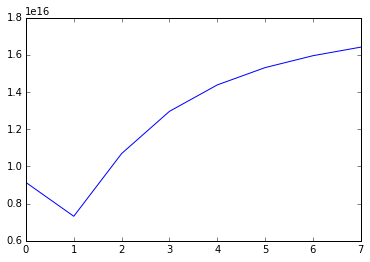

In [38]:
# Training error
plt.plot([i for i in poly_dict], [i.mse_resid for i in poly_dict.values()])

#almost everything is either nan or infinit?

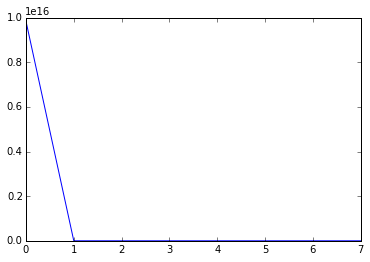

In [34]:
#Test error
plt.plot([i for i in poly_dict], [np.mean(abs(poly_test.DomesticTotalGross - i.predict(poly_test.Budget))) for i in poly_dict.values()])

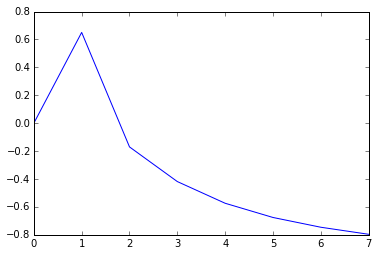

In [35]:
# R squared
plt.plot([i for i in poly_dict], [i.rsquared for i in poly_dict.values()])

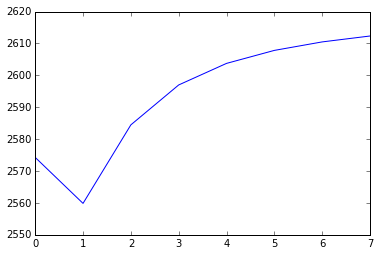

In [36]:
# AIC
plt.plot([i for i in poly_dict], [i.aic for i in poly_dict.values()])

In [37]:
poly_train.head()

,const,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate,0th,1th,2th,3th,4th,5th,6th,7th
Title,,,,,,,,,,,,,,,
A Haunted House,1,2500000,40041683,Michael Tiddes,R,80,2013-01-11 00:00:00,1,2500000,6.250000e+12,1.562500e+19,3.906250e+25,9.765625e+31,2.441406e+38,6.103516e+44
The Purge,1,3000000,64473115,James DeMonaco,R,85,2013-06-07 00:00:00,1,3000000,9.000000e+12,2.700000e+19,8.100000e+25,2.430000e+32,7.290000e+38,2.187000e+45
Dallas Buyers Club,1,5000000,27298285,Jean-Marc Vallee,R,117,2013-11-01 00:00:00,1,5000000,2.500000e+13,1.250000e+20,6.250000e+26,3.125000e+33,1.562500e+40,7.812500e+46
Insidious Chapter 2,1,5000000,83586447,James Wan,PG-13,105,2013-09-13 00:00:00,1,5000000,2.500000e+13,1.250000e+20,6.250000e+26,3.125000e+33,1.562500e+40,7.812500e+46
One Direction: This is Us,1,10000000,28873374,Morgan Spurlock,PG,92,2013-08-30 00:00:00,1,10000000,1.000000e+14,1.000000e+21,1.000000e+28,1.000000e+35,1.000000e+42,1.000000e+49


##### Challenge 5

Fit a model to only the first 5 of your data points (m=5). Then to
first 10 (m=10). Then to first 15 (m=15). In this manner, keep fitting
until you fit your entire training set. For each step, calculate the
training error and the test error. Plot both (in the same plot) over
m. This is called a learning curve.



#no idea. how do you compute error for test set? i think mse_resid is error for train set but im not even sure about that.